In [1]:
!pip install ultralytics

In [2]:
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

In [3]:
model = YOLO("yolo11n.pt")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


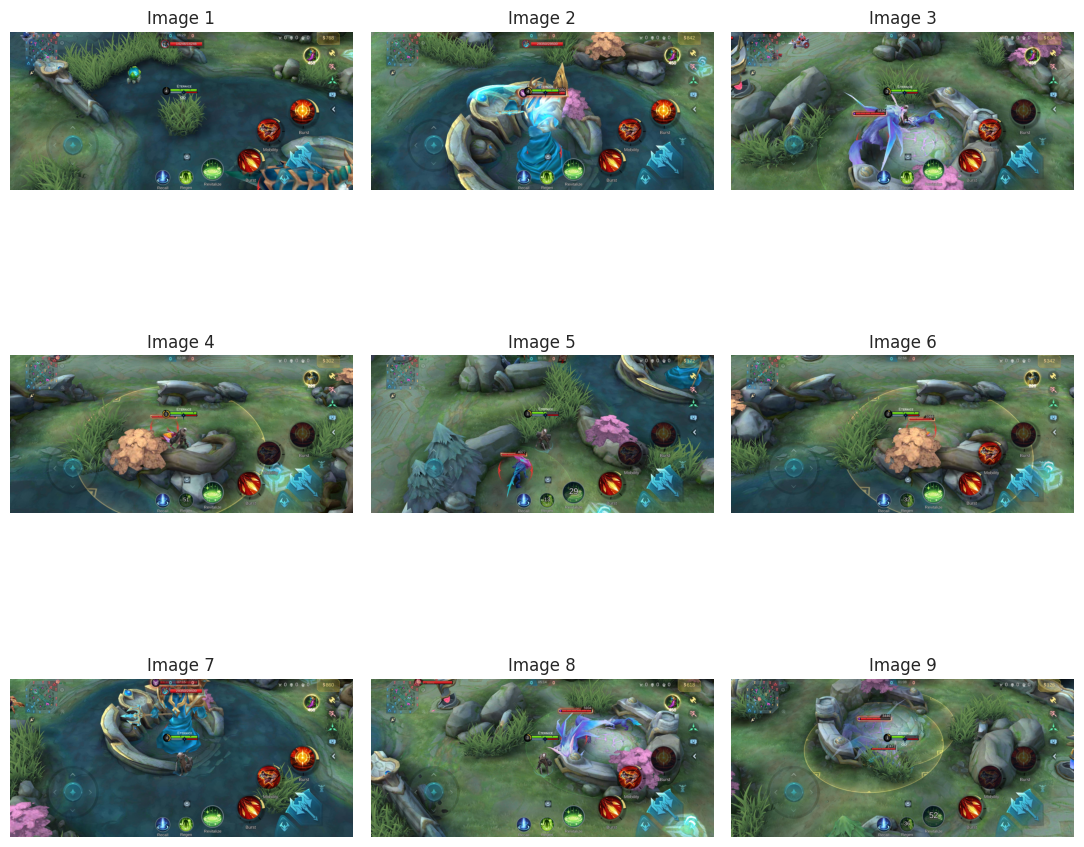

In [5]:
# Path ke folder di Google Drive
Image_dir = '/content/drive/My Drive/Colab Notebooks/jungle_creep/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [6]:
# Build from YAML and transfer weights
Final_model = YOLO('yolo11n.pt')

# Training The Final Model
Result_Final_model = Final_model.train(data="/content/drive/My Drive/Colab Notebooks/jungle_creep/data.yaml",epochs = 20, batch = 1, optimizer = 'auto')

Ultralytics 8.3.54 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/drive/My Drive/Colab Notebooks/jungle_creep/data.yaml, epochs=20, time=None, patience=100, batch=1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_lab

train: Scanning /content/drive/My Drive/Colab Notebooks/jungle_creep/train/labels... 37 images, 0 backgrounds, 0 corrupt: 100%|██████████| 37/37 [00:42<00:00,  1.16s/it]

train: New cache created: /content/drive/My Drive/Colab Notebooks/jungle_creep/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/My Drive/Colab Notebooks/jungle_creep/valid/labels... 11 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11/11 [00:14<00:00,  1.36s/it]

val: New cache created: /content/drive/My Drive/Colab Notebooks/jungle_creep/valid/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000769, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20     0.371G      2.406      4.835      1.999          3        640: 100%|██████████| 37/37 [00:07<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.13it/s]

                   all         11         18   0.000824      0.167    0.00212   0.000957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20     0.254G        2.4      5.258      1.953          2        640: 100%|██████████| 37/37 [00:03<00:00,  9.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 11.07it/s]

                   all         11         18   0.000969      0.167    0.00226    0.00126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20     0.256G      2.332      5.348      2.042          2        640: 100%|██████████| 37/37 [00:05<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 18.04it/s]

                   all         11         18    0.00231      0.292     0.0104    0.00442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20     0.256G      2.368      4.817      1.989          4        640: 100%|██████████| 37/37 [00:03<00:00, 10.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 18.03it/s]

                   all         11         18    0.00231      0.292     0.0104    0.00442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20     0.273G       1.98      5.173      1.845          2        640: 100%|██████████| 37/37 [00:03<00:00,  9.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 13.37it/s]


                   all         11         18    0.00109      0.125    0.00135   0.000435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20     0.273G      1.785      4.988      1.742          2        640: 100%|██████████| 37/37 [00:05<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 14.53it/s]

                   all         11         18    0.00292      0.396     0.0925     0.0434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20     0.273G      1.798      4.665      1.644          6        640: 100%|██████████| 37/37 [00:03<00:00, 10.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.60it/s]

                   all         11         18    0.00292      0.396     0.0925     0.0434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20     0.273G      1.709      4.766      1.531          2        640: 100%|██████████| 37/37 [00:03<00:00, 10.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 17.97it/s]

                   all         11         18      0.927     0.0346      0.144     0.0773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20     0.273G      1.592      4.957      1.345          1        640: 100%|██████████| 37/37 [00:05<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 10.32it/s]

                   all         11         18      0.927     0.0346      0.144     0.0773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20     0.273G      1.666      4.438      1.464          3        640: 100%|██████████| 37/37 [00:03<00:00, 10.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.32it/s]

                   all         11         18    0.00413      0.521       0.15      0.069


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20     0.273G      1.559      4.919      1.398          1        640: 100%|██████████| 37/37 [00:03<00:00,  9.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.84it/s]

                   all         11         18    0.00413      0.521       0.15      0.069



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20     0.273G      1.801      4.859       1.53          1        640: 100%|██████████| 37/37 [00:05<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 11.82it/s]


                   all         11         18      0.719      0.104      0.167     0.0906

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20     0.273G      1.728      4.825      1.501          1        640: 100%|██████████| 37/37 [00:03<00:00, 10.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.66it/s]

                   all         11         18      0.462     0.0817      0.149     0.0793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20     0.273G      1.538      4.478      1.382          1        640: 100%|██████████| 37/37 [00:03<00:00, 10.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.69it/s]

                   all         11         18      0.462     0.0817      0.149     0.0793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20     0.273G      1.478      4.456      1.378          2        640: 100%|██████████| 37/37 [00:05<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  9.75it/s]

                   all         11         18      0.494      0.169      0.165     0.0893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20     0.273G      1.501      4.459      1.366          1        640: 100%|██████████| 37/37 [00:03<00:00, 10.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 17.06it/s]

                   all         11         18      0.494      0.169      0.165     0.0893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20     0.273G      1.523      4.509      1.402          1        640: 100%|██████████| 37/37 [00:03<00:00, 10.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 17.60it/s]

                   all         11         18      0.522      0.164      0.202      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20     0.273G       1.56      4.707      1.356          1        640: 100%|██████████| 37/37 [00:04<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 10.94it/s]


                   all         11         18      0.522      0.164      0.202      0.105

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20     0.273G      1.546      4.551      1.391          1        640: 100%|██████████| 37/37 [00:03<00:00,  9.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.97it/s]

                   all         11         18      0.524      0.197      0.262      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20     0.273G      1.576      4.575      1.391          1        640: 100%|██████████| 37/37 [00:03<00:00, 10.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 16.09it/s]

                   all         11         18      0.532      0.207      0.234       0.12



20 epochs completed in 0.032 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.4MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.4MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.54 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,907 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 14.96it/s]


                   all         11         18      0.523      0.197      0.262      0.119
                beetle          2          2      0.494          1      0.828      0.481
             buff biru          2          3          0          0      0.096     0.0286
            buff merah          3          3      0.331      0.333      0.185     0.0934
                 golem          1          1          1          0     0.0398    0.00686
              kelomang          2          2          1          0       0.19      0.137
                 litho          3          3          1          0          0          0
                lizard          1          1          0          0    0.00796    0.00637
                turtle          3          3      0.358      0.239      0.746      0.203
Speed: 0.7ms preprocess, 21.7ms inference, 0.0ms loss, 7.4ms postprocess per image
Results saved to runs/detect/train2


In [7]:
# Configure the visual appearance of Seaborn plots
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

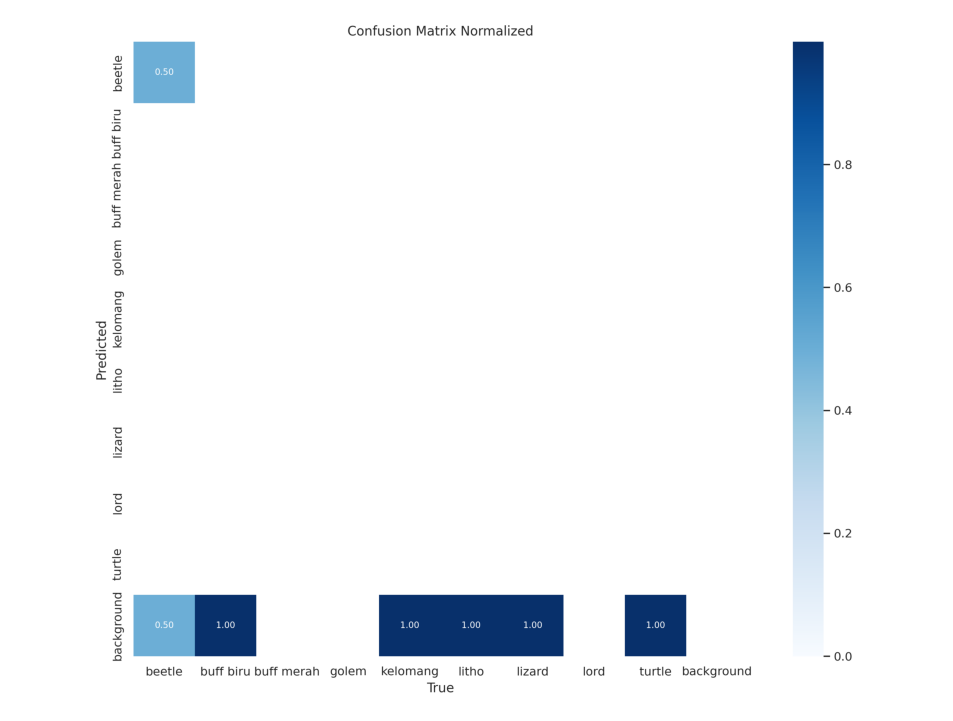

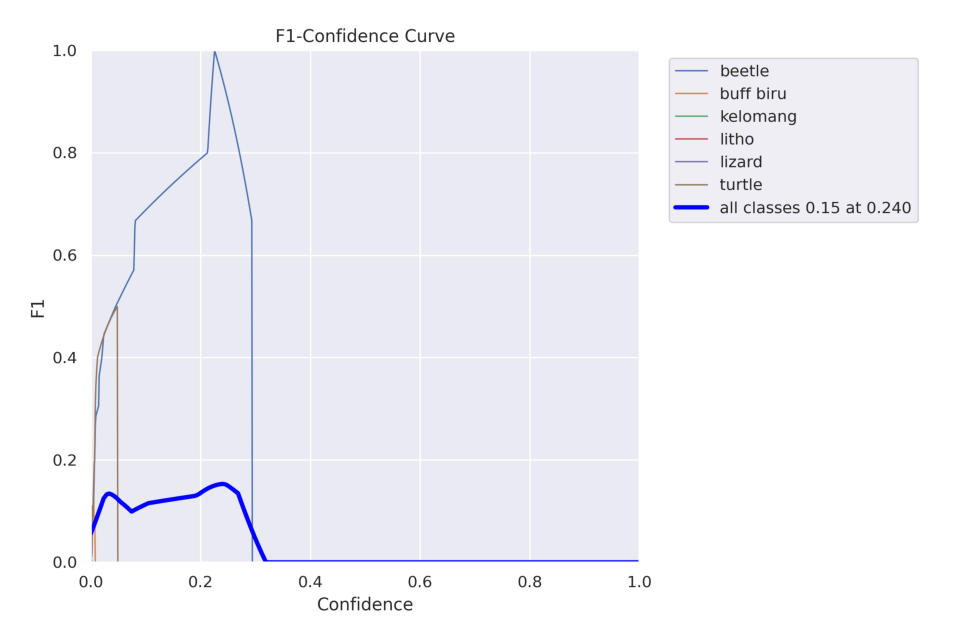

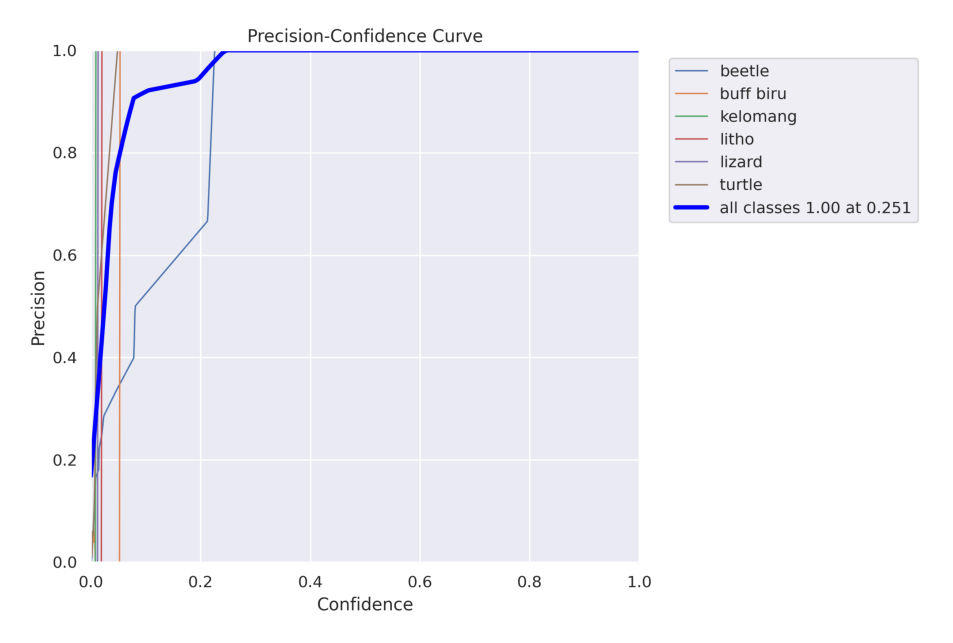

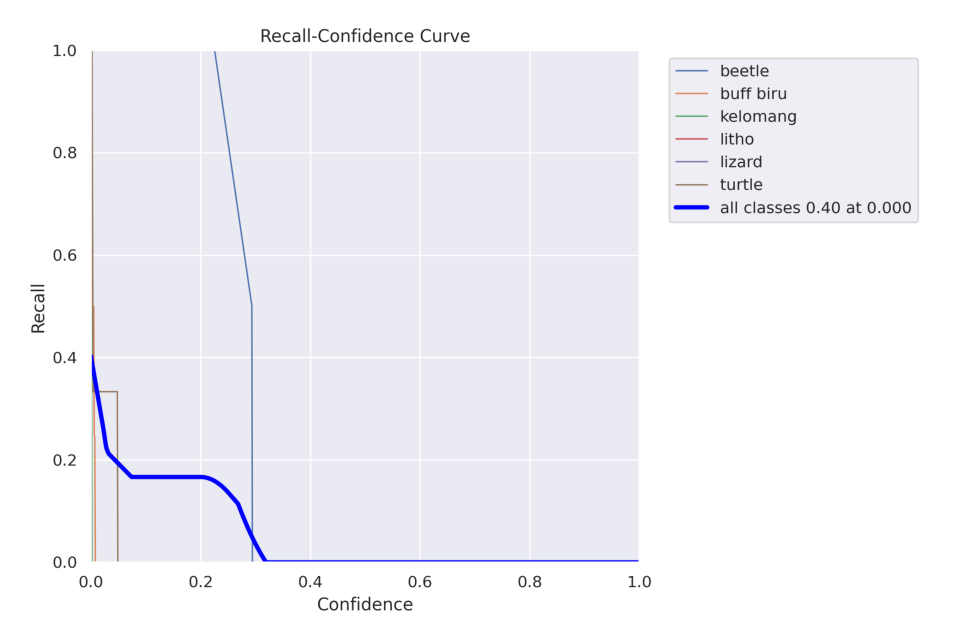

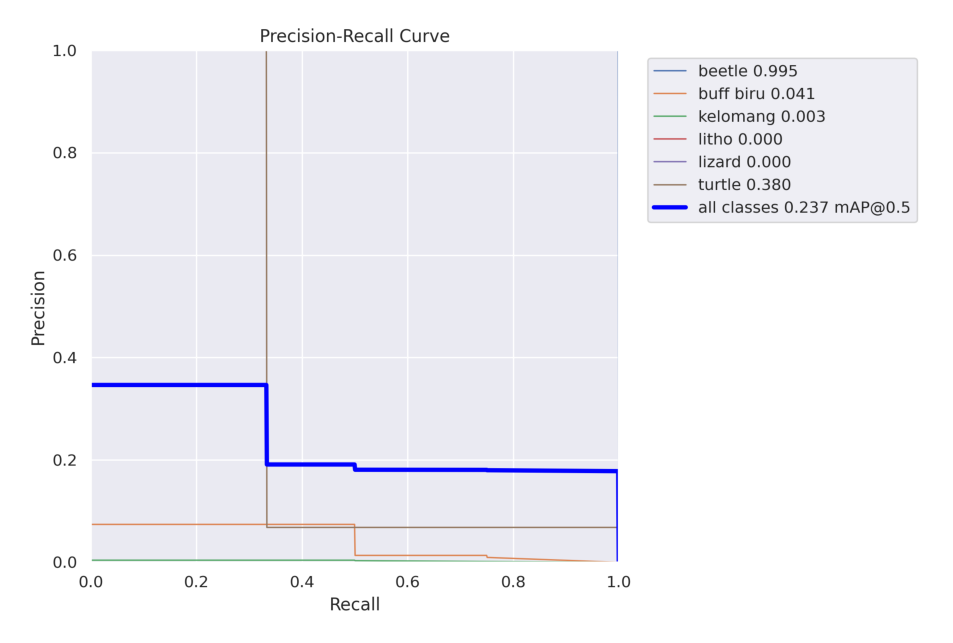

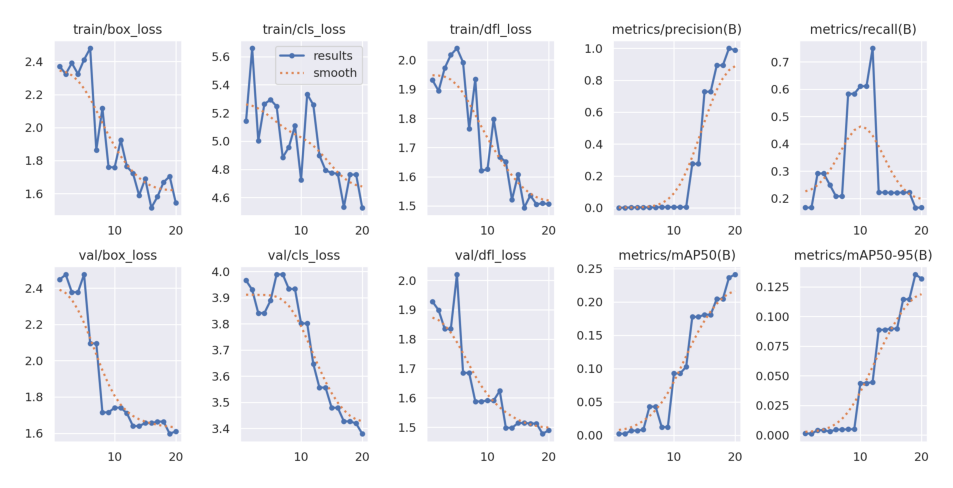

In [8]:
import os
import cv2
import matplotlib.pyplot as plt

def display_images(post_training_files_path, image_files):

    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# List of image files to display
image_files = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]

# Path to the directory containing the images
post_training_files_path = 'runs/detect/train'

# Display the images
display_images(post_training_files_path, image_files)

In [9]:
Result_Final_model = pd.read_csv('runs/detect/train/results.csv')
Result_Final_model.tail(10)

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
10,11,79.1976,1.92416,5.33244,1.79762,0.00413,0.61111,0.09261,0.04369,1.74086,3.80153,1.59082,0.000388,0.000388,0.000388
11,12,83.8415,1.76365,5.25754,1.66736,0.00511,0.75000,0.10277,0.04469,1.71054,3.64635,1.62396,0.000350,0.000350,0.000350
12,13,89.0893,1.72275,4.89827,1.65154,0.27578,0.22222,0.17749,0.08871,1.63950,3.55622,1.49808,0.000312,0.000312,0.000312
13,14,95.3881,1.58891,4.79299,1.52078,0.27578,0.22222,0.17749,0.08871,1.63950,3.55622,1.49808,0.000274,0.000274,0.000274
14,15,99.7745,1.68878,4.77382,1.60776,0.72788,0.22118,0.18077,0.08967,1.65596,3.47906,1.51441,0.000236,0.000236,0.000236
15,16,104.1740,1.51452,4.76920,1.49393,0.72788,0.22118,0.18077,0.08967,1.65596,3.47906,1.51441,0.000198,0.000198,0.000198
16,17,110.7780,1.58054,4.53269,1.53584,0.89328,0.22222,0.20454,0.11442,1.66426,3.42695,1.51272,0.000160,0.000160,0.000160
17,18,115.0910,1.66892,4.76175,1.50558,0.89328,0.22222,0.20454,0.11442,1.66426,3.42695,1.51272,0.000122,0.000122,0.000122
18,19,119.4200,1.70434,4.76305,1.50900,1.00000,0.16648,0.23636,0.13537,1.59695,3.41890,1.47771,0.000084,0.000084,0.000084
19,20,125.9260,1.54345,4.52773,1.50613,0.98805,0.16667,0.24118,0.13179,1.61069,3.37944,1.48942,0.000046,0.000046,0.000046


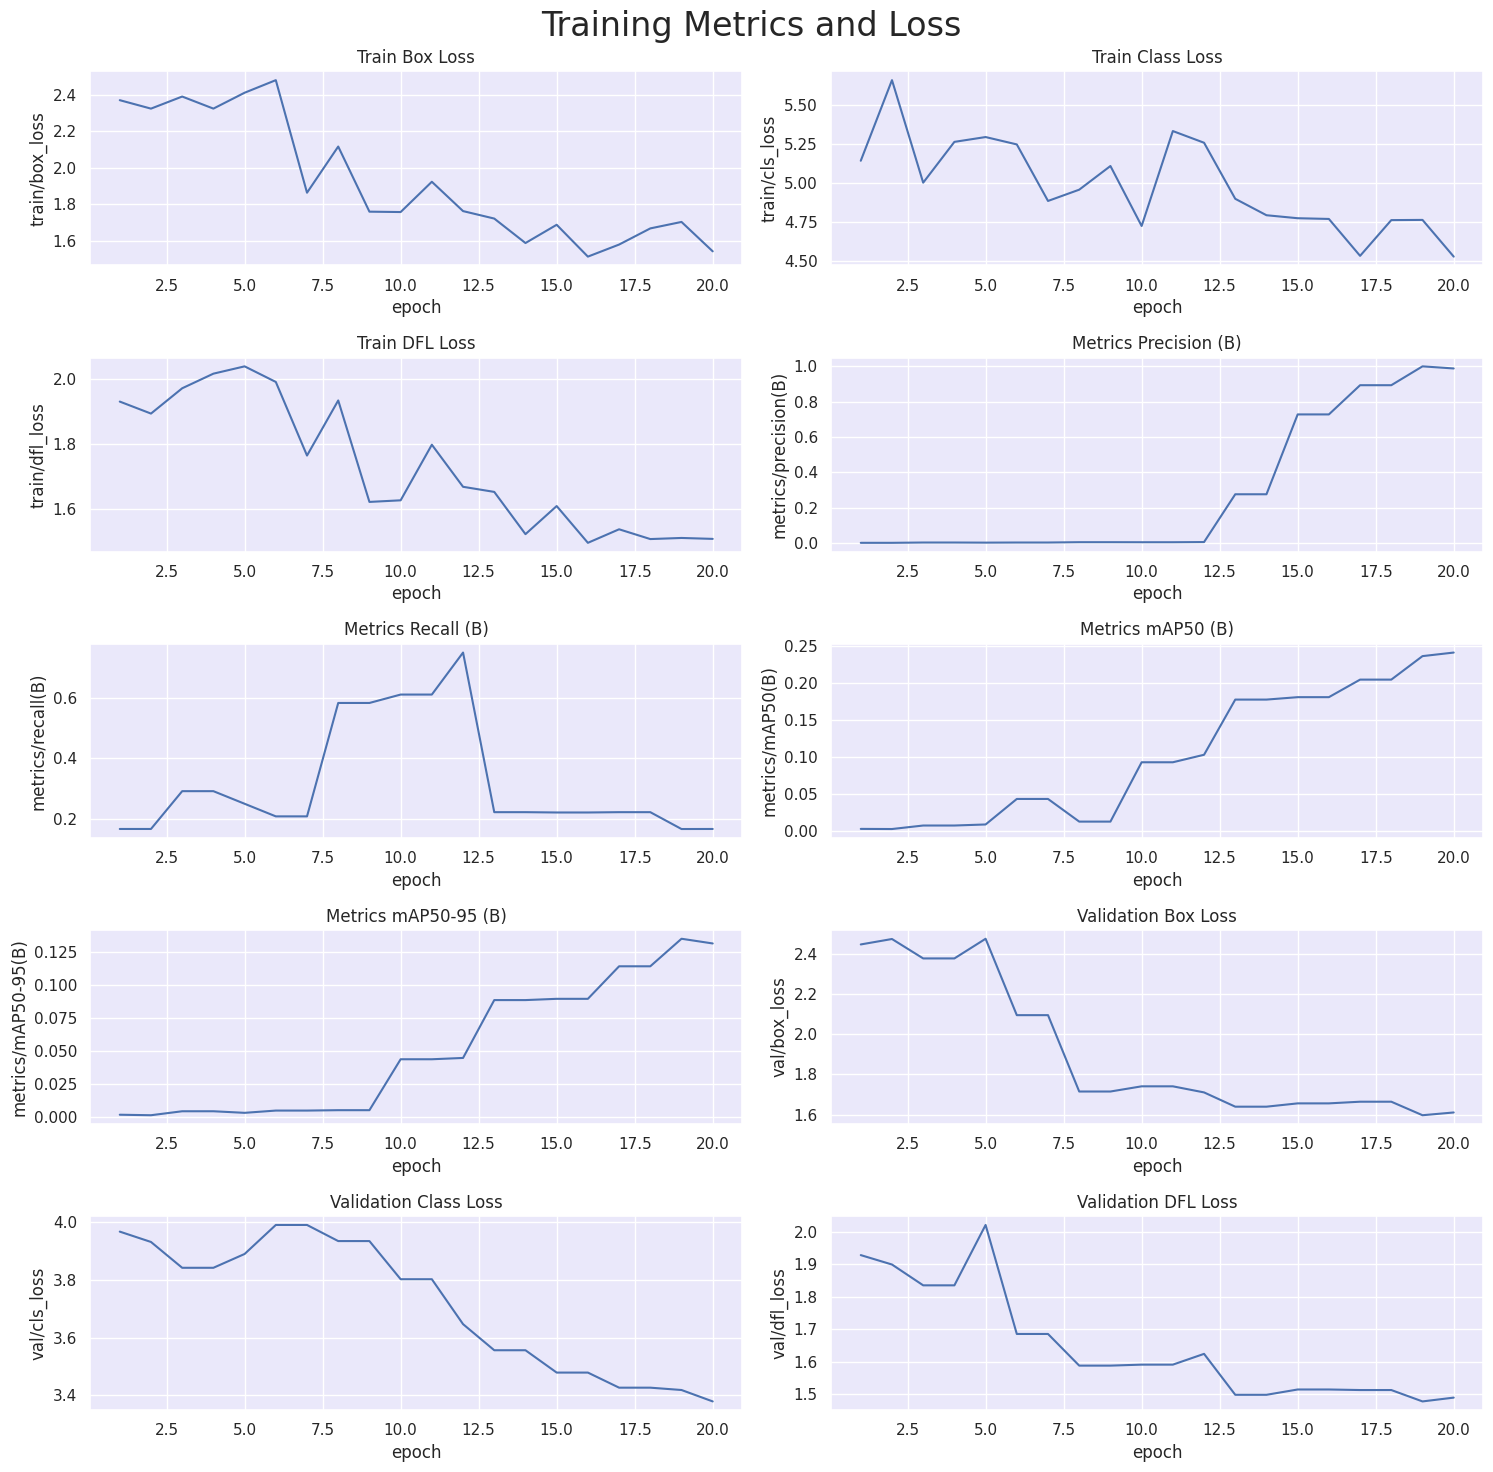

In [10]:
# Read the results.csv file as a pandas dataframe
Result_Final_model.columns = Result_Final_model.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=Result_Final_model, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=Result_Final_model, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=Result_Final_model, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=Result_Final_model, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=Result_Final_model, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=Result_Final_model, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=Result_Final_model, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=Result_Final_model, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=Result_Final_model, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=Result_Final_model, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')


plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

In [11]:
# Loading the best performing model
Valid_model = YOLO('runs/detect/train/weights/best.pt')

In [12]:
# Evaluating the model on the validset
metrics = Valid_model.val(split = 'val')

# final results
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

Ultralytics 8.3.54 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,907 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/drive/My Drive/Colab Notebooks/jungle_creep/valid/labels.cache... 11 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11/11 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]


                   all         11         18      0.804     0.0625      0.279       0.15
                beetle          2          2      0.432        0.5      0.745      0.422
             buff biru          2          3          1          0     0.0485     0.0208
            buff merah          3          3          0          0     0.0535     0.0168
                 golem          1          1          1          0      0.995      0.597
              kelomang          2          2          1          0     0.0213     0.0128
                 litho          3          3          1          0          0          0
                lizard          1          1          1          0          0          0
                turtle          3          3          1          0      0.365      0.132
Speed: 0.3ms preprocess, 16.6ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/val2
precision(B):  0.8040211341443895
metrics/recall(B):  0.0625
metrics/mAP50(B):  0.

In [13]:
#results = Valid_model("video.mp4", save=True, save_txt=False, save_conf=False)

In [14]:
# Export the model
Valid_model.export(format='onnx')

Ultralytics 8.3.54 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 13, 8400) (5.2 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.45...
ONNX: export success ✅ 2.2s, saved as 'runs/detect/train/weights/best.onnx' (10.1 MB)

Export complete (2.7s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train/weights/best.onnx imgsz=640 data=/content/drive/My Drive/Colab Notebooks/jungle_creep/data.yaml  
Visualize:       https://netron.app


'runs/detect/train/weights/best.onnx'